### DEFRA API
In this Jupyter notebook we will use DEFRA API to retrieve an environmental dataset.

In [1]:
import requests     # HTTP library
import pandas as pd # data analysis library
import datetime     # module for manipulating dates and times
import seaborn as sns           # statistical visualization library
import matplotlib.pyplot as plt # plotting library

In [2]:
# DEFRA flood monitoring endpoint
API_endpoint = "https://environment.data.gov.uk/flood-monitoring/data/readings?latest"

In [3]:
# pull the data from the API
response = requests.get(API_endpoint)

In [4]:
# count number of rainfall stations
print("Number of stations:", len(response.json()["items"]))

Number of stations: 4937


In [5]:
# extract the data from the API response
data = response.json()["items"]
# turn into pandas data frame
df = pd.DataFrame(data)

In [6]:
df.head(5)

,@id,dateTime,measure,value
0,http://environment.data.gov.uk/flood-monitorin...,2022-02-21T01:30:00Z,http://environment.data.gov.uk/flood-monitorin...,4.802
1,http://environment.data.gov.uk/flood-monitorin...,2022-02-24T11:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.000
2,http://environment.data.gov.uk/flood-monitorin...,2022-02-24T11:00:00Z,http://environment.data.gov.uk/flood-monitorin...,20.294
3,http://environment.data.gov.uk/flood-monitorin...,2022-02-24T12:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.587
4,http://environment.data.gov.uk/flood-monitorin...,2022-02-25T14:00:00Z,http://environment.data.gov.uk/flood-monitorin...,1.035


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   @id       4937 non-null   object 
 1   dateTime  4937 non-null   object 
 2   measure   4937 non-null   object 
 3   value     4937 non-null   float64
dtypes: float64(1), object(3)
memory usage: 154.4+ KB


In [8]:
# parse the date and time from the data
df["ts"] = pd.to_datetime(df["dateTime"])

In [9]:
df.head(5)

,@id,dateTime,measure,value,ts
0,http://environment.data.gov.uk/flood-monitorin...,2022-02-21T01:30:00Z,http://environment.data.gov.uk/flood-monitorin...,4.802,2022-02-21 01:30:00+00:00
1,http://environment.data.gov.uk/flood-monitorin...,2022-02-24T11:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.000,2022-02-24 11:00:00+00:00
2,http://environment.data.gov.uk/flood-monitorin...,2022-02-24T11:00:00Z,http://environment.data.gov.uk/flood-monitorin...,20.294,2022-02-24 11:00:00+00:00
3,http://environment.data.gov.uk/flood-monitorin...,2022-02-24T12:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.587,2022-02-24 12:00:00+00:00
4,http://environment.data.gov.uk/flood-monitorin...,2022-02-25T14:00:00Z,http://environment.data.gov.uk/flood-monitorin...,1.035,2022-02-25 14:00:00+00:00


/Users/peter/opt/anaconda3/envs/EDA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

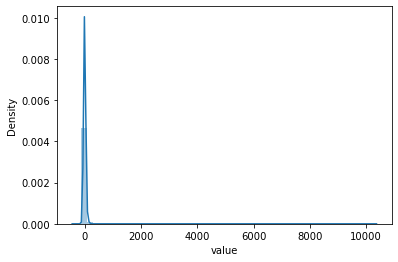

In [12]:
# plot distributions of rainfall
sns.distplot(df["value"])